<a href="https://colab.research.google.com/github/Sagi15G/de_python_course/blob/main/pandas_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Before we start..

The most important thing you have to remember is that 

**you don't have to remember anything!**


##When you have a question, just **GOOGLE** it  


#Agenda

* Basic Concepts
  * Pandas Series
  * Pandas DataFrame

* Data Extraction 
* Data Exploration
* Basic Data Manipultaions


# Basic Concepts

In [2]:
# It is very common to use the "pd" alias when importing pandas
import pandas as pd

"""
Since pandas is a well maintained library, 
let's check the version that we are using so we can be specific when 
tyring to find a solution in Google
"""
pd.__version__


'1.1.5'

### Series
**`Series`** in pandas is a representatin of a column.

You can see a `Series` as a list of values

[documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) 

In [23]:
# note that the dtype inferred from the data
color_series = pd.Series(data=['Blue', 'Green', 'Red'])
color_series

0     Blue
1    Green
2      Red
dtype: object

In [24]:
size_series = pd.Series(data=[4.5, 3, 2])
size_series

0    4.5
1    3.0
2    2.0
dtype: float64

### DataFrame
**`DataFrame`** in pandas is a representatin of a table.

Each `DataFrame` contains one or more `Series` 

[documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) 

In [27]:
# There are many ways to create a DataFrame
# For example, here we use the Series objects from before
my_df = pd.DataFrame( { 'color': color_series, 'size': size_series })
my_df

,color,size
0,Blue,4.5
1,Green,3.0
2,Red,2.0


In [31]:
# Creating a DataFrame from list of lists

# initialize list of lists
list_of_lists = [['Tom', 10], ['Jerry', 15], ['Maya']]
  
# Create the pandas DataFrame
pd.DataFrame(list_of_lists, columns = ['Name', 'Age'])

,Name,Age
0,Tom,10.0
1,Jerry,15.0
2,Maya,NaN


###Data Extraction
One of the powerfull features of pandas is the simplicity of reading data from different sources.

[read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

[read_json](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)

[read_sql](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html)

Let's clone into our machine some CSVs from github and load them into a DataFrame



In [32]:
# using "!" on this notebook will run a bash command
! git clone https://github.com/Sagi15G/de_python_course.git

Cloning into 'de_python_course'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [36]:
# listing the files on our working directory to see the files
!ls

de_python_course  sample_data


In [39]:
# this is the path of our course files
!ls de_python_course/data/movies_csv/*

de_python_course/data/movies_csv/links.csv
de_python_course/data/movies_csv/movies.csv
de_python_course/data/movies_csv/ratings.csv
de_python_course/data/movies_csv/README.txt
de_python_course/data/movies_csv/tags.csv


In [42]:
# quickly go over the README file
!cat de_python_course/data/movies_csv/README.txt

Summary

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

This is a *development* dataset. As such, it may change over time and is not an appropriate dataset for shared research results. See available *benchmark* datasets if that is your intent.

This and other GroupLens data sets are publicly available for down

In [47]:
# now that we have some files let's load one of them
movies_df = pd.read_csv(filepath_or_buffer='de_python_course/data/movies_csv/movies.csv',sep=',')
# head--> print the first rows (default as 5)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Data Exploration


In [48]:
# Let's see some pandas functions that will help us to understand our data

# info(). --> columns metadata
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [49]:
# describe --> data basic statistics
# note that in default we see only numeric columns
movies_df.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [53]:
# using include='all' will show all the columns
movies_df.describe(include='all')

,movieId,title,genres
count,9742.000000,9742,9742
unique,NaN,9737,951
top,NaN,Emma (1996),Drama
freq,NaN,2,1053
mean,42200.353623,NaN,NaN
std,52160.494854,NaN,NaN
min,1.000000,NaN,NaN
25%,3248.250000,NaN,NaN
50%,7300.000000,NaN,NaN
75%,76232.000000,NaN,NaN


In [55]:
# another usefull function to start with is value_counts()
"""
same as this SQL command
SELECT genres,COUNT(*)
FROM movies_df
GROUP BY genres
"""

movies_df["genres"].value_counts()

Drama                            1053
Comedy                            946
Comedy|Drama                      435
Comedy|Romance                    363
Drama|Romance                     349
                                 ... 
Action|Drama|Horror                 1
Action|Fantasy|Sci-Fi|IMAX          1
Drama|Horror|Musical|Thriller       1
Comedy|Crime|Drama|Fantasy          1
Animation|Sci-Fi|IMAX               1
Name: genres, Length: 951, dtype: int64

### Basic Data Manipulations

In [57]:
# let's fist load another data frame
ratings_df = pd.read_csv(filepath_or_buffer='de_python_course/data/movies_csv/ratings.csv',sep=',')
ratings_df.head(10)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [59]:
# a quick exploration
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [61]:
# accessing columns is pretty straightforward 
# for example, let's filter only movies with rating >=4
ratings_df[ratings_df["rating"] >= 4].head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [73]:
# now let's add a new column that will show us timestamp as a datetime object
ratings_df['timestamp_as_datetime'] = pd.to_datetime(ratings_df['timestamp'],unit='s')
ratings_df.head()



,userId,movieId,rating,timestamp,timestamp_as_date,timestamp_as_datetime
0,1,1,4.0,964982703,2000-07-30 18:45:03,2000-07-30 18:45:03
1,1,3,4.0,964981247,2000-07-30 18:20:47,2000-07-30 18:20:47
2,1,6,4.0,964982224,2000-07-30 18:37:04,2000-07-30 18:37:04
3,1,47,5.0,964983815,2000-07-30 19:03:35,2000-07-30 19:03:35
4,1,50,5.0,964982931,2000-07-30 18:48:51,2000-07-30 18:48:51


In [80]:
# let's calculate the average rating per year
ratings_df.groupby(ratings_df["timestamp_as_datetime"].dt.year, sort=True)["rating"].mean()

timestamp_as_datetime
1996    3.535927
1997    3.727557
1998    3.435897
1999    3.772448
2000    3.392506
2001    3.512239
2002    3.606958
2003    3.499377
2004    3.506099
2005    3.431533
2006    3.487928
2007    3.309039
2008    3.656746
2009    3.392496
2010    3.463494
2011    3.784024
2012    3.641323
2013    3.877404
2014    3.510771
2015    3.513830
2016    3.686334
2017    3.348805
2018    3.389062
Name: rating, dtype: float64

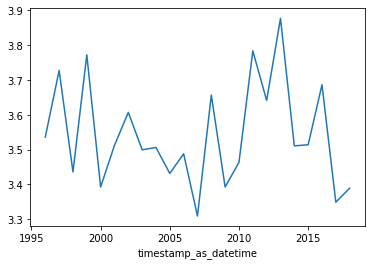

In [81]:
# A spoiler of the next sessions: why not plotting it?
ratings_df.groupby(ratings_df["timestamp_as_datetime"].dt.year, sort=True)["rating"].mean().plot()

### Summary
There are multiple ways to work with pandas

Don't try to remember them, just Google your need and save precious time (: